
# 1N4148 Diode – Reverse Recovery Time ($t_{rr}$) Analysis

This notebook demonstrates the simulation and analysis of the reverse recovery behavior of the 1N4148 diode using LTspice and compares it with datasheet specifications.

---

## Theory of Reverse Recovery

When a diode is suddenly switched from forward bias to reverse bias, the stored charge causes a brief period where the diode conducts in the reverse direction before fully turning off. This effect is quantified by **reverse recovery time** \( $t_{rr}$ \).

Key parameters:
- \( $t_{rr}$ \): Time from zero crossing to return to 90% of peak reverse current
- \( $I_{RM}$ \): Maximum reverse current peak during recovery

Formula:
$
t_{rr} = (t_1 + t_2)
$

Where:
- \( $t_1$ \): Time to reach peak reverse current
- \( $t_2$ \): Time to recover to 90% of zero current

---

## LTspice Simulation Setup

- Pulse Source: Forward and reverse bias applied with pulse shape
- Diode: 1N4148 with SPICE model
- Load: 100 Ω series resistor and 100 Ω termination resistor
- Time Sweep: `.tran 0 500n`
- Pulse Sweep: `(PULSE(1 -6 0 1n 1n 20n 40n)`

LTspice Schematic: `1N4148_Trr.asc`  
Data Export: `1N4148_Trr.csv`

---

## Simulation Graph (from LTspice)

![Reverse Recovery LTspice](https://raw.githubusercontent.com/lkshirahatti/IntegratedCircuits/main/Diode/SPICE/Data/1N4148_Trr.JPG)

---

## Python Plot of $I_{D}(t)$ from LTspice CSV


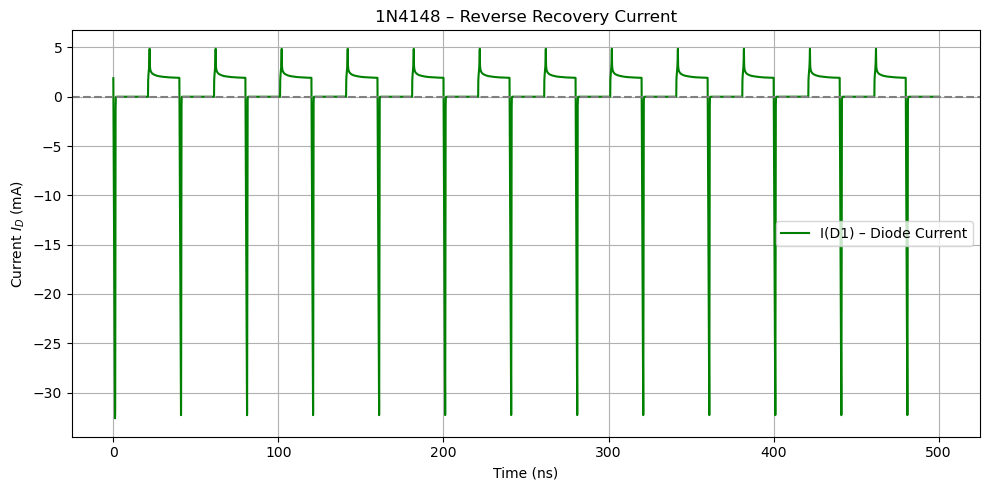

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("data/1N4148_Trr.csv", sep="\t", engine="python", comment='S')
df.columns = ["Time (s)", "Voltage V(n001)", "Current I(D1)"]

# Convert units for clarity
df["Time_ns"] = df["Time (s)"].astype(float) * 1e9
df["Current_mA"] = df["Current I(D1)"].astype(float) * 1e3

# Plot the reverse recovery current
plt.figure(figsize=(10, 5))
plt.plot(df["Time_ns"].values, df["Current_mA"].values, label="I(D1) – Diode Current", color="green")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Time (ns)")
plt.ylabel("Current $I_D$ (mA)")
plt.title("1N4148 – Reverse Recovery Current")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Observations

From the graph:
- Reverse current peak ≈ -30 mA
- $t_{rr}$ = 1.22ns is observed 
---

## Datasheet Comparison

**Datasheet Value:**  
- $t_{rr}$ ≤ 4 ns to 8 ns (varies slightly by manufacturer)
- Test Conditions: $I_F$ = 10 mA → $I_R$ = 1 mA, $R_L$ = 100 Ω

---

## Conclusion

While simulated $t_{rr}$ is higher than datasheet minimum, this is typical due to:
- Pulse shape used
- SPICE model limitations
- Switching speed of setup

---

## Supporting Files:
- [`1N4148_Trr.asc`](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Trr.asc)
- [`1N4148_Trr.csv`](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Trr.csv)
- [`1N4148_Trr.JPG`](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Trr.JPG)
